## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combines = mouse_metadata.merge(study_results, on= "Mouse ID")

# Display the data table for preview
combines

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
uniques=pd.unique(combines["Mouse ID"])
len(uniques)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duped_Mice = combines[combines.duplicated(['Mouse ID', 'Timepoint'])]
Duped_Mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

g989=combines.loc[combines["Mouse ID"]=="g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
g989_index=g989.index
clean=combines.drop(index = g989_index)
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
Duped_Mice_Check = clean[clean.duplicated(['Mouse ID', 'Timepoint'])]
Duped_Mice_Check
clean_uniques=pd.unique(clean["Mouse ID"])
len(clean_uniques)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped=clean.groupby(["Drug Regimen"])
grouped_mean=grouped.mean()
grouped_median=grouped.median()
grouped_var=grouped.var()
grouped_std=grouped.std()
grouped_sem=grouped.sem()

gmean = grouped_mean.iloc[:,[3]]
gmedian = grouped_median.iloc[:,[3]]
gvar = grouped_var.iloc[:,[3]]
gstd = grouped_std.iloc[:,[3]]
gsem = grouped_sem.iloc[:,[3]]
#stats=gmean.join(gmedian)
stats = gmean.merge(gmedian, how='outer', left_index=True, right_index=True)
stats=stats.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (mm3) Mean", 
                                                "Tumor Volume (mm3)_y":"Tumor Volume (mm3) Median",
                                                })
stats =stats.merge(gvar, how='outer', left_index=True, right_index=True)
stats =stats.merge(gstd, how='outer', left_index=True, right_index=True)
stats =stats.merge(gsem, how='outer', left_index=True, right_index=True)
stats=stats.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (mm3) Variance", 
                                                "Tumor Volume (mm3)_y":"Tumor Volume (mm3) Std Dev", 
                                                "Tumor Volume (mm3)":"Tumor Volume (mm3) SEM"
                                                })
stats


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_tumor_size=grouped["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line
grouped_tumor_size.agg(["mean","median","var", "std", "sem" ])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

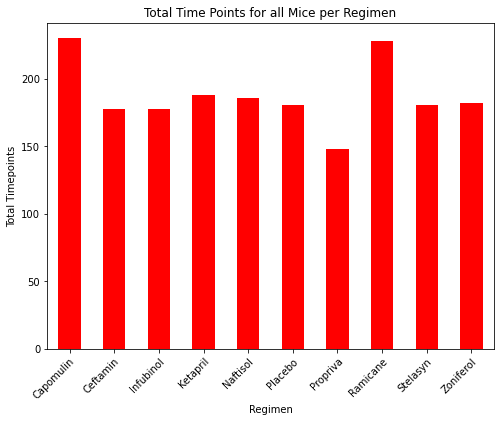

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timed_grouped=grouped["Timepoint"].count()
#timed_grouped
plot1 = timed_grouped.plot(kind="bar", facecolor="red", figsize=(8,6),
                                title="Total Time Points for all Mice per Regimen",
                                xlabel="Regimen",
                                ylabel="Total Timepoints")

# Configure x-tick rotation
plot1.set_xticklabels(timed_grouped.index, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

[]

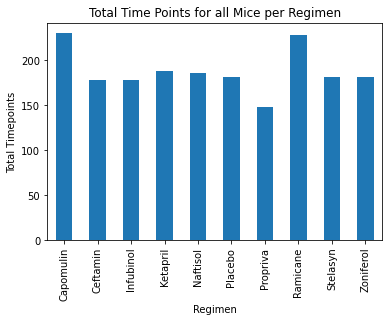

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timed_grouped.plot(kind="bar")
plt.title("Total Time Points for all Mice per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Total Timepoints")
plt.plot()


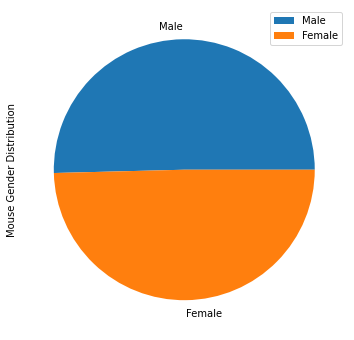

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_df=clean.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
#sex_df
total=len(sex_df["Sex"])
total_males=len(sex_df.loc[sex_df["Sex"]=="Male"])
total_females=len(sex_df.loc[sex_df["Sex"]=="Female"])
#print([total,total_males,total_females])
percent_males=(total_males/total)*100
percent_females=(total_females/total)*100
percents=[percent_males, percent_females]
#print([percent_males,percent_females])
pandas_pie=pd.DataFrame({"Mouse Gender Distribution":[percent_males, percent_females],"Sex":["Male","Female"]}, index = ["Male","Female"] )
pandas_pie.plot.pie(y="Mouse Gender Distribution", figsize= (6,6))
plt.show()

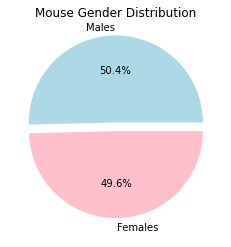

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(percents, explode= (0.1,0), labels=["Males", "Females"], colors=["lightblue","pink"], autopct="%1.1f%%")
plt.title("Mouse Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
grouped_mice=clean.groupby(["Mouse ID"])
grouped_mice_tp=grouped_mice["Timepoint"].max()
#grouped_mice_tp
grouped_mice_tp_merged=pd.merge(grouped_mice_tp, clean, on=["Mouse ID","Timepoint"], how="left")
grouped_mice_tp_merged_reg=grouped_mice_tp_merged.loc[grouped_mice_tp_merged["Drug Regimen"].isin
                                                      (["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
quartiles = []
means=[]
uppers = []
lowers=[]

# Create empty list to fill with tumor vol data (for plotting)
Cap=grouped_mice_tp_merged_reg.loc[grouped_mice_tp_merged["Drug Regimen"]=="Capomulin"]
Ram=grouped_mice_tp_merged_reg.loc[grouped_mice_tp_merged["Drug Regimen"]=="Ramicane"]
Inf=grouped_mice_tp_merged_reg.loc[grouped_mice_tp_merged["Drug Regimen"]=="Infubinol"]
Cef=grouped_mice_tp_merged_reg.loc[grouped_mice_tp_merged["Drug Regimen"]=="Ceftamin"]

treatments2=[Cap,Ram,Inf,Cef]
for x in treatments2:
    q3, q1 = np.percentile(x["Tumor Volume (mm3)"], [75 ,25])
    iqr = q3 - q1
    quartiles.append(iqr)
    mean_grouped=x["Tumor Volume (mm3)"].mean()
    means.append(mean_grouped)
    uppers.append(q3+(iqr*1.5))
    lowers.append(q1-(iqr*1.5))
#print(quartiles)
#print(means)
#print(uppers)
#print(lowers)

#Outliers = pd.DataFrame(treatments,columns=["Drug Regimen"])

Outliers=pd.DataFrame({"Drug Regimen":treatments,"Quartiles":quartiles,"Means":means,"Lower Outlier Limit":lowers,"Upper Outlier Limit":uppers})
Outliers.set_index("Drug Regimen")


#Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds




,Quartiles,Means,Lower Outlier Limit,Upper Outlier Limit
Drug Regimen,,,,
Capomulin,7.781863,36.667568,20.704562,51.832015
Ramicane,9.098537,36.191390,17.912664,54.306811
Infubinol,11.477135,58.178246,36.832905,82.741446
Ceftamin,15.577752,57.753977,25.355450,87.666458


In [15]:
Cap_Outliers=Cap.loc[(Cap["Tumor Volume (mm3)"]>uppers[0]) | (Cap["Tumor Volume (mm3)"]<lowers[0])]
Cap_Outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [16]:
Ram_Outliers=Ram.loc[(Ram["Tumor Volume (mm3)"]>uppers[1]) | (Ram["Tumor Volume (mm3)"]<lowers[1])]
Ram_Outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [17]:
Inf_Outliers=Inf.loc[(Inf["Tumor Volume (mm3)"]>uppers[2]) | (Inf["Tumor Volume (mm3)"]<lowers[2])]
Inf_Outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


In [18]:
Cef_Outliers=Cef.loc[(Cef["Tumor Volume (mm3)"]>uppers[3]) | (Cef["Tumor Volume (mm3)"]<lowers[3])]
Cef_Outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


[]

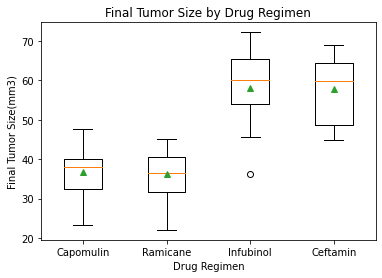

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([Cap["Tumor Volume (mm3)"],Ram["Tumor Volume (mm3)"],
             Inf["Tumor Volume (mm3)"],Cef["Tumor Volume (mm3)"]], showmeans=True, labels=treatments)
plt.title("Final Tumor Size by Drug Regimen")
plt.ylabel("Final Tumor Size(mm3)")
plt.xlabel("Drug Regimen")
plt.plot()

## Line and Scatter Plots

[]

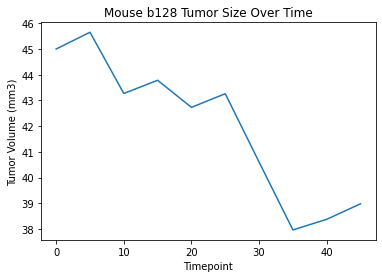

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse=Cap.iloc[0,0]
Cap0=clean.loc[(clean["Mouse ID"]==mouse)]
Cap0.head()
plt.plot(Cap0["Timepoint"],Cap0["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Mouse {mouse} Tumor Size Over Time")
plt.plot()

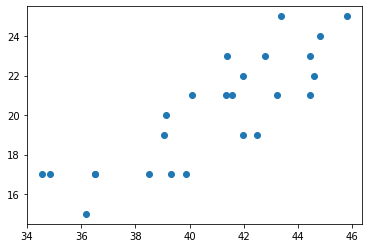

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Cap1=clean.loc[(clean["Drug Regimen"]=="Capomulin")]
Cap1=Cap1.groupby("Mouse ID").mean()
plt.scatter(Cap1["Tumor Volume (mm3)"],Cap1["Weight (g)"])
plt.title="Capomulin Regimen, Average Tumor Volume Vs Average Mouse Weight"
plt.xlabel="Average Tumor Volume"
plt.ylabel="Average Mouse Weight"

plt.show()

## Correlation and Regression

The Correlation Coefficient is [1.         0.84193634]


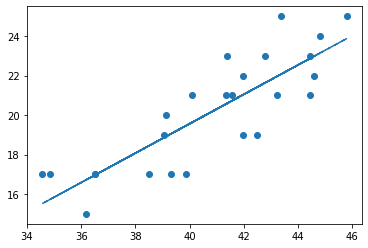

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correff=np.corrcoef(Cap1["Tumor Volume (mm3)"],Cap1["Weight (g)"])
Avg_Vol=Cap1["Tumor Volume (mm3)"]
Avg_Weight=Cap1["Weight (g)"]
tumor_slope, tumor_int, tumor_r, tumor_p, tumor_std_err = st.linregress(Avg_Vol, Avg_Weight)
Avg_Vol.astype("int32")
lin_reg = tumor_slope * Avg_Vol + tumor_int
plt.scatter(Cap1["Tumor Volume (mm3)"],Cap1["Weight (g)"])
plt.title="Capomulin Regimen, Average Tumor Volume Vs Average Mouse Weight"
plt.xlabel="Average Tumor Volume"
plt.ylabel="Average Mouse Weight"
correff=correff[0]

plt.plot(Avg_Vol,lin_reg,"--")
print(f"The Correlation Coefficient is {correff}")
plt.show()

In [ ]:
#Observations:
#Capomulin was effective at reducing tumor size in mouse b128
#Capomulin and Ramicane Helped mice live longer
#Larger tumors were found in heavier mice